In [8]:
import numpy as np

# 定义参数
width_ew = 4 * 1852  # 东西宽度, 海里转换为米
length_ns = 2 * 1852  # 南北长度, 海里转换为米
D_center = 110  # 海域中心点处的海水深度
alpha = np.radians(1.5)  # 坡度转换为弧度
theta = np.radians(120)  # 多波束换能器的开角转换为弧度

# 使用分段优化策略确定测线位置
current_position = 0  # 从西侧开始
lines_positions = [current_position]
total_length = 0

while current_position < width_ew:
    # 计算当前位置的深度和覆盖宽度
    Dx = D_center + current_position * np.tan(alpha)
    Wx = 2 * Dx / np.cos(alpha) * np.tan(theta / 2)
    
    # 考虑重叠率，确定下一条测线的位置
    overlap = Wx * 0.15  # 使用15%的重叠率
    step = Wx - overlap
    
    current_position += step
    lines_positions.append(current_position)
    total_length += step


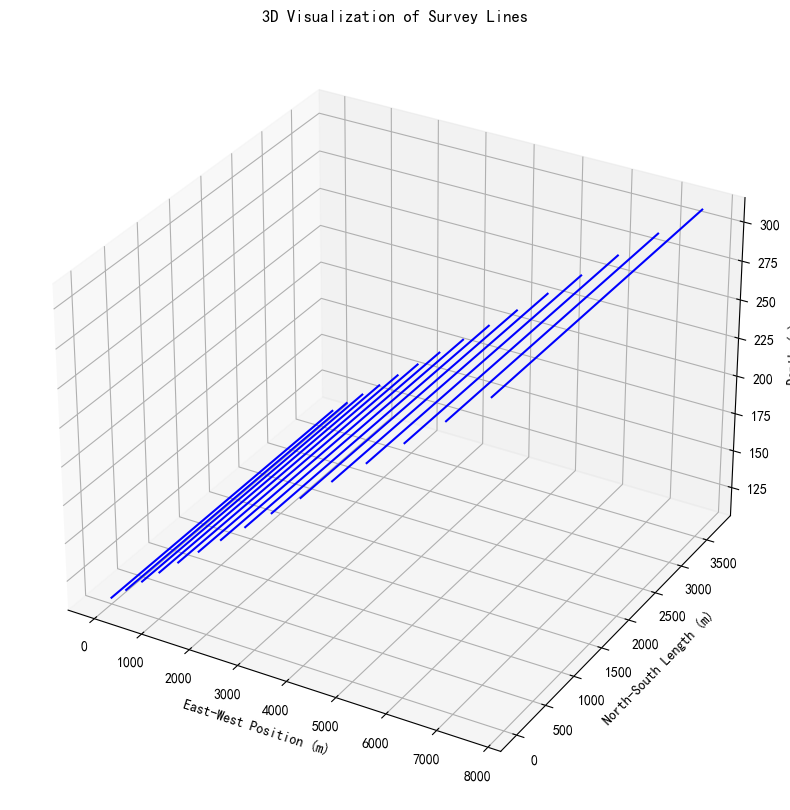

In [9]:
import matplotlib.pyplot as plt

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define the sea area dimensions
length_ns = 2 * 1852  # Convert from nautical miles to meters
width_ew = 4 * 1852  # Convert from nautical miles to meters

# Plot each line
for pos in lines_positions:
    # Calculate depth at current position
    Dx = D_center + pos * np.tan(alpha)
    
    # Plot the line
    ax.plot([pos, pos], [0, length_ns], [Dx, Dx], color='b')

# Set labels and title
ax.set_xlabel('East-West Position (m)')
ax.set_ylabel('North-South Length (m)')
ax.set_zlabel('Depth (m)')
ax.set_title('3D Visualization of Survey Lines')

# Display the plot
plt.show()


In [11]:
import numpy as np
import pandas as pd

# 定义参数
width_ew = 4 * 1852  # 东西宽度, 海里转换为米
length_ns = 2 * 1852  # 南北长度, 海里转换为米
D_center = 110  # 海域中心点处的海水深度
alpha = np.radians(1.5)  # 坡度转换为弧度
theta = np.radians(120)  # 多波束换能器的开角转换为弧度

# 分段优化策略，增加详细的输出

# 重新初始化变量
current_position = 0  # 从西侧开始
lines_positions = [current_position]
total_length = 0
overlap_rates = []
coverage_areas = []
segment_count = 0

while current_position < width_ew:
    segment_count += 1
    # 计算当前位置的深度和覆盖宽度
    Dx = D_center + current_position * np.tan(alpha)
    Wx = 2 * Dx / np.cos(alpha) * np.tan(theta / 2)
    
    # 考虑重叠率，确定下一条测线的位置
    overlap = Wx * 0.15  # 使用15%的重叠率
    overlap_rates.append(0.15)  # 存储重叠率
    step = Wx - overlap
    coverage_area = step * length_ns  # 计算覆盖面积
    coverage_areas.append(coverage_area)  # 存储覆盖面积
    
    current_position += step
    lines_positions.append(current_position)
    total_length += step

# 输出每一段的详细信息
segments_info = {
    "Segment": list(range(1, segment_count + 1)),
    "End Position (m)": lines_positions[1:],
    "Overlap Rate": overlap_rates,
    "Coverage Area (m^2)": coverage_areas
}
segments_df = pd.DataFrame(segments_info)

# 计算总的覆盖面积和总的海域面积
total_coverage_area = sum(coverage_areas)
total_area = width_ew * length_ns
num_of_lines = len(lines_positions)
average_overlap_rate = np.mean(overlap_rates)

print(segments_df)
print("分段数:", segment_count)
print("测线数:", num_of_lines)
print("总长度:", total_length)
print("平均重叠率:", average_overlap_rate)
print("总覆盖面积:", total_coverage_area)
print("海域总面积:", total_area)



    Segment  End Position (m)  Overlap Rate  Coverage Area (m^2)
0         1        324.004529          0.15         1.200113e+06
1         2        672.999696          0.15         1.292678e+06
2         3       1048.913042          0.15         1.392383e+06
3         4       1453.820780          0.15         1.499778e+06
4         5       1889.959262          0.15         1.615457e+06
5         6       2359.737331          0.15         1.740058e+06
6         7       2865.749628          0.15         1.874270e+06
7         8       3410.790916          0.15         2.018833e+06
8         9       3997.871522          0.15         2.174547e+06
9        10       4630.233960          0.15         2.342270e+06
10       11       5311.370842          0.15         2.522931e+06
11       12       6045.044166          0.15         2.717526e+06
12       13       6835.306095          0.15         2.927130e+06
13       14       7686.521337          0.15         3.152901e+06
分段数: 14
测线数: 15
总长度: 7686